# Machine Learning: Predicting Fuel Efficiency
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 9/20/2022

In [1]:
# Load the csv through pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fuel_df = pd.read_csv('auto-mpg.csv')
fuel_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
# Remove the car name column.
fuel_df.drop('car name', axis = 1, inplace = True)
fuel_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
# Figure out why horsepower is a string and replace any strings with the column mean
total = 0
for i in range(len(fuel_df)):
    if(fuel_df['horsepower'][i] != "?"):
        total = total + int(fuel_df['horsepower'][i])

meanValue = total / len(fuel_df)

# Replace the question marks with the mean value.
for i in range(len(fuel_df)):
    if(fuel_df['horsepower'][i] == "?"):
        fuel_df['horsepower'][i] = meanValue
        
meanValue


C:\Users\Josh\AppData\Local\Temp\ipykernel_12784\3944067840.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_df['horsepower'][i] = meanValue


102.89447236180905

In [4]:
# Create dummy variables for the origin column
fuel_origins = pd.get_dummies(fuel_df['origin'])
fuel_origins.head(5)

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


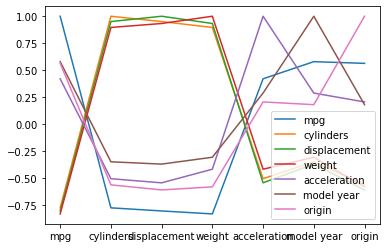

"\nOrigin and accelleration appear to have the closest correlation.  However, the tails of each are extremely volatile\nwhich doesn't compare to mpg.\n"

In [5]:
# Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
correllation_matrix = fuel_df.corr()

correllation_matrix.plot()
plt.show()

'''
Origin and accelleration appear to have the closest correlation.  However, the tails of each are extremely volatile
which doesn't compare to mpg.
'''

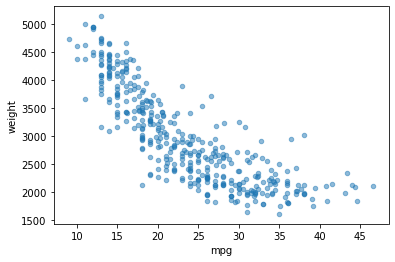

'\nIt appears that as weight increase, miles per gallon reduces.  Compared with the correlation coefficient, there is an \ninverse relationship.\n'

In [6]:
# Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
fuel_df.plot.scatter(x = "mpg", y = "weight", alpha = 0.5)
plt.show()

'''
It appears that as weight increase, miles per gallon reduces.  Compared with the correlation coefficient, there is an 
inverse relationship.
'''

In [7]:
# Randomly split the data into 80% training data and 20% test data, where your target is mpg.
from sklearn.model_selection import train_test_split

train, test = train_test_split(fuel_df, test_size = 0.2, train_size = 0.8)

In [8]:
# Train an ordinary linear regression on the training data
from sklearn.linear_model import LinearRegression

target = train.mpg
features = train.drop(['mpg'],axis=1).values

# Create the linear regression model
regression = LinearRegression()

# Fit the linear Regression
model = regression.fit(features, target)

# View the intercept.
model.intercept_

-21.5908760626149

In [14]:
# Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# Calculate the values for train data.
rmse = mean_squared_error(features, target, squared = False)


print("Train data")
print(f"R2: {regression.score(features, target)}")
print(f"RMSE: {mean_squared_error(features, target, squared = False)}")

Train data
R2: 0.8283096101504194


ValueError: y_true and y_pred have different number of output (7!=1)

In [ ]:
# Pick another regression model and repeat the previous two steps. 
# Note: Do NOT choose logistic regression as it is more like a classification model.
from sklearn.linear_model import Lasso

